In [1]:
import pandas as pd
import numpy as np
from hopfield import HopfieldNetwork
from test_cases import TestCase
import os

dir = "Data"

test_cases = []
for _, _, files in os.walk(dir):
    for file in files:
        test_cases.append(TestCase(file, dir))


for test_case in test_cases:
    print("Test case -- ", test_case.name)
    print()

    patterns_number = len(test_case.patterns)
    network = HopfieldNetwork(test_case.shape[0] * test_case.shape[1])
    network.train_hebbian(patterns=test_case.patterns)

    hebbian_stable = 0
    hebbian_correct = 0
    hebbian_async_stable = 0
    hebbian_async_correct = 0
    for pattern in test_case.patterns:
        (retrived_pattern, stable) = network.recall(pattern)
        hebbian_stable += stable
        hebbian_correct += np.array_equal(pattern, retrived_pattern)
        (retrived_pattern, stable) = network.recall_async(pattern)
        hebbian_async_stable += stable
        hebbian_async_correct += np.array_equal(pattern, retrived_pattern)

    network = HopfieldNetwork(test_case.shape[0] * test_case.shape[1])
    network.train_oja(patterns=test_case.patterns)

    oja_stable = 0
    oja_correct = 0
    oja_async_stable = 0
    oja_async_correct = 0
    for pattern in test_case.patterns:
        (retrived_pattern, stable) = network.recall(pattern)
        oja_stable += stable
        oja_correct += np.array_equal(pattern, retrived_pattern)
        (retrived_pattern, stable) = network.recall_async(pattern)
        oja_async_stable += stable
        oja_async_correct += np.array_equal(pattern, retrived_pattern)


    print(f"Hebbian synchronous stable patterns: {hebbian_stable} ({round(100*hebbian_stable/patterns_number,2)}%)")
    print(f"Hebbian synchronous correct patterns: {hebbian_correct} ({round(100*hebbian_correct/patterns_number,2)}%)")
    print()
    print(f"Hebbian asynchronous stable patterns: {hebbian_async_stable} ({round(100*hebbian_async_stable/patterns_number,2)}%)")
    print(f"Hebbian asynchronous correct patterns: {hebbian_async_correct} ({round(100*hebbian_async_correct/patterns_number,2)}%)")
    print()
    print(f"Oja synchronous stable patterns: {oja_stable} ({round(100*oja_stable/patterns_number,2)}%)")
    print(f"Oja synchronous correct patterns: {oja_correct} ({round(100*oja_correct/patterns_number,2)}%)")
    print()
    print(f"Oja asynchronous stable patterns: {oja_async_stable} ({round(100*oja_async_stable/patterns_number,2)}%)")
    print(f"Oja asynchronous correct patterns: {oja_async_correct} ({round(100*oja_async_correct/patterns_number,2)}%)")
    print()
    print()


Test case --  animals-14x9.csv

Hebbian synchronous stable patterns: 6 (100.0%)
Hebbian synchronous correct patterns: 2 (33.33%)

Hebbian asynchronous stable patterns: 6 (100.0%)
Hebbian asynchronous correct patterns: 6 (100.0%)

Oja synchronous stable patterns: 6 (100.0%)
Oja synchronous correct patterns: 1 (16.67%)

Oja asynchronous stable patterns: 6 (100.0%)
Oja asynchronous correct patterns: 6 (100.0%)


Test case --  large-25x25.csv

Hebbian synchronous stable patterns: 6 (100.0%)
Hebbian synchronous correct patterns: 5 (83.33%)

Hebbian asynchronous stable patterns: 6 (100.0%)
Hebbian asynchronous correct patterns: 6 (100.0%)

Oja synchronous stable patterns: 6 (100.0%)
Oja synchronous correct patterns: 1 (16.67%)

Oja asynchronous stable patterns: 6 (100.0%)
Oja asynchronous correct patterns: 6 (100.0%)


Test case --  large-25x25.plus.csv

Hebbian synchronous stable patterns: 15 (100.0%)
Hebbian synchronous correct patterns: 1 (6.67%)

Hebbian asynchronous stable patterns: 15 

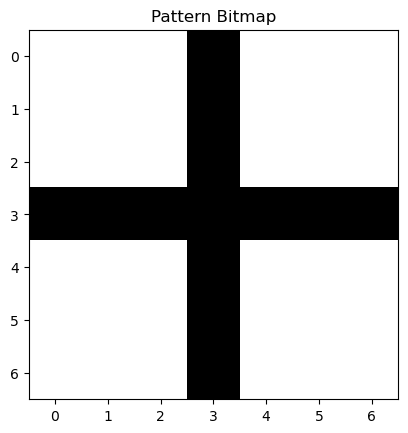

In [5]:

import matplotlib.pyplot as plt
import numpy as np

pattern = [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1]

width = 7
height = 7

pattern_array = np.array(pattern)

pattern_array = pattern_array[:width * height].reshape((height, width))
bitmap = np.where(pattern_array == 1, 255, 0)

plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.title('Pattern Bitmap')
plt.show()